# California House price prediction

In this notebook, we are trying to predict the prices of houses in California and we will use analytical tools of statistics and prediction models to predict the prices of the housing in California.
we shall also use different machine learning models and choose which one performs the best.


So, it is always essential to get accustommed with the data, understand some terminologies in the data before proceeding tot the technical part of the analysis.

the dataset generates data from the 1970 to 2010 of the houses in california accompanied by different details or features which will serve as dependeant variables in predicting the prices of the houses.

Bellow are the terminologies and their actual meanings:

##### longitude: the distance from north to south of the location relative to equator, here used to designate coordinates.

##### latitude: distance from east to west relative to the Greenwich median, also used to designate coordinates

##### housing_median_age: the age of a particular building

##### total_rooms: number of rooms the house contains

##### total_bedrooms: the number of bedrooms a house contains

##### population: density of population in particular neighborhood.

##### households: number of people in particular house. 	

##### median_income: the median income of the people in a particular neighborhood 

##### median_house_value: the price of the value in average value.

##### ocean_proximity: the proximity of a house to the ocean.


In [5]:
# importing all the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler

In [6]:
# importing the data

# we will use pandas as a library to import our data

df=pd.read_csv('housing.csv')
df.head(5)

#getting to know the data

df.info() # the data shows 20640 columns and 10 columns, hence a dimension(10,20640)

#checking the first 5 rows

df.head(5)

#checking the shape of the data
df.shape # we observe the data has 10 different  independent variables

# checking the types of data
df.dtypes # we observe that our dataset has 9 variables that are float and one variable, i.e ocean_proximity that is categorical

# checking the count of the value of the houses in the dataset

df['median_house_value'].value_counts() #we observe that we have many houses that are above a half of a million of dollars while we have a small portion of house bellow a half of hundred thousands dollars


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: count, Length: 3842, dtype: int64

In [7]:
# descriptive analysis of the data
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


coefficient= 0.1056234124932095 p_value= 2.761860676107593e-52


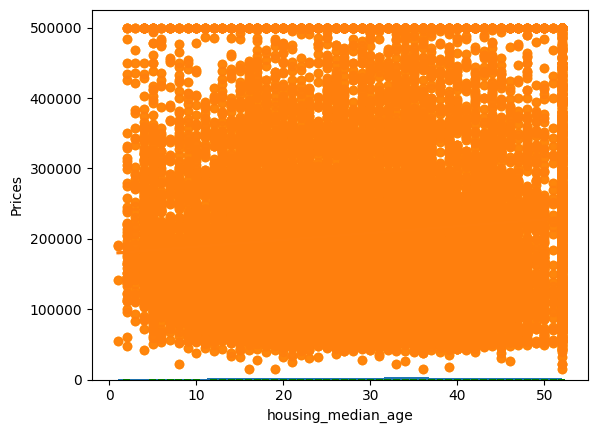

In [8]:
# before moving ahead, we must already indicate what is our target variable and that is the mdeian house value and we shall rename it 'price'
df.rename(columns={'median_house_value':'Prices'}, inplace=True)
# checking the mean of the age of the house, the newest and the oldest
age=df['housing_median_age']
df['housing_median_age'].mean() #the average age of the house is 26.5 years old

# checking the distribution of the variable age
plt.hist(age)
plt.bar(age.unique(),age.value_counts(),color='green')
# checking the median value of ages of houses
age.median()
# checking the the age of the oldest 
age.max()
# checking the age of the latest house
age.min()

# we will want to check the variable price also
price=df['Prices']
# distribution of the prices
# checking maximum prices
price.max()
# median price
price.median()
# checking the mean and the variation of the data
price.mean()
price.std() # we can use these metrics for all the variables in the dataset

# grouping by age and prices to check their relations in terms of their means, standard variations and variances

df.groupby('housing_median_age').agg({'Prices':['mean', 'std', 'var']}).reset_index()


# correlation between the prices and the age, let us use scatter plot to check

plt.scatter(age, price, color='orange') # plot shows no clear correlation

# let us regplot of seaborn to check the correlation of the data

sns.regplot(x='housing_median_age',y='Prices',data=df) #still no clear correlation
plt.ylim(0,)

# let's use a correlation_stattistics, we use the pearson coefficient correlation method
pearson_coef,p_value=scipy.stats.pearsonr(age,price)
print('coefficient=',pearson_coef,'p_value=',p_value)

# the pearson coefficient is close to 0 implying a no correlation between the two variables by themselves and that's why multiple variables are needed to find their correlation

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Prices,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## extensive statistics on the variables

In [10]:
# calculate the z_score for a standardized normal distribution for a house value of less or equal 45000 and more than 45000 
R=45000
M=df.Prices.mean()
S=df.Prices.std()
print('Mean=',M, 'Std=',S)
DI=R-M
print(DI)
Z_score=DI/S
print('Z_score=',Z_score) 
prob0=scipy.stats.norm.cdf((Z_score))
print('prob0=',prob0)
print('prob_price_value', 1-prob0)

# let us use python libraries to that end.

mean_r=round(df.Prices.mean(),100)
std_r=round(df.Prices.std(),100)
print(mean_r,std_r)

# we use therefore the scipy to find the probabilities to see those of <=100000 and >=100000
d=100000-mean_r
print(d)
val=d/std_r
print(val)
prob0=scipy.stats.norm.cdf((val))
print(prob0)
print(1-prob0)

Mean= 206855.81690891474 Std= 115395.61587441387
-161855.81690891474
Z_score= -1.402616691132044
prob0= 0.08036558590894122
prob_price_value 0.9196344140910588
206855.81690891474 115395.61587441385
-106855.81690891474
-0.9259954643788803
0.17722416867812069
0.8227758313218794


In [11]:
df.Prices.value_counts()

Prices
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: count, Length: 3842, dtype: int64

##### we therefore conclude that there is high (92% and 82% ) probability to find a house of more than 45000 and 100000 respectively than the probability of getting less those values.

In [12]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
#TESTING SAMPLE MEANS OF OCEAN PROXIMITY HOUSES

# we set our null hypothesis that the houses near bay have same means and variances as houses near ocean, here we assume their variances are equal.
# our level of significance is 5% i.e P-value to reject the null hypothesis should be less or equal to 0.05 and fail to reject if it's above that value.
levene=scipy.stats.levene(df['ocean_proximity']==3,df['ocean_proximity']==2)
print('levene:',levene)
ttest=scipy.stats.ttest_ind(df['ocean_proximity']==3,df['ocean_proximity']==2, equal_var=True)
print('ttest:',ttest)

levene: LeveneResult(statistic=nan, pvalue=nan)
ttest: TtestResult(statistic=nan, pvalue=nan, df=41278.0)


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:3345: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


##### P_value is less than 0.005, therefore we reject our null hypothesis and this infers that the means and variances of the two samples are different

In [14]:
# let's group the houses into 5 different categories of their prices and their proximity to the ocean and infer their meansand standard devaitions.
# binning
price_proximity=df.groupby('ocean_proximity').agg({'Prices':['mean', 'std']}).reset_index()
price_proximity

ocean_proximity         Prices               
                            mean            std
0       <1H OCEAN  240084.285464  106124.292213
1          INLAND  124805.392001   70007.908494
2          ISLAND  380440.000000   80559.561816
3        NEAR BAY  259212.311790  122818.537064
4      NEAR OCEAN  249433.977427  122477.145927

In [15]:
# let's check the avergae number of bedrooms in regard to the proximity of the house.
proximity_bedrooms=df.groupby('ocean_proximity').agg({'total_bedrooms':['mean','std']}).reset_index()
proximity_bedrooms

ocean_proximity total_bedrooms            
                            mean         std
0       <1H OCEAN     546.539185  427.911417
1          INLAND     533.881619  446.117778
2          ISLAND     420.400000  169.320111
3        NEAR BAY     514.182819  367.887605
4      NEAR OCEAN     538.615677  376.320045

In [16]:
# preprocessing the data

# 1. missing values
md=df.isnull()
md.value_counts()
md['total_bedrooms'].value_counts()
# we need to count missing values in each column.
df.isnull()
df.dropna(inplace=True)
df.isnull().sum()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  Prices  ocean_proximity
False      False     False               False        False           False       False       False          False   False              20433
Name: count, dtype: int64

In [17]:
# trnasforming categorical variables into numerical numbers
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
Prices                float64
ocean_proximity        object
dtype: object

In [18]:
# is there a correlation between the number of rooms a house have and their prices.
h=df[['total_rooms', 'Prices']]

In [19]:
# ANOVA
f_statistic, p_value=scipy.stats.f_oneway(df['total_rooms'],df['Prices'])
print('f_distribution',f_statistic, 'the p_value is', p_value)

f_distribution 63933.23388172135 the p_value is 0.0


### EDA with vizualization

In [20]:
# data vizisualization
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Prices,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='ocean_proximity', ylabel='population'>

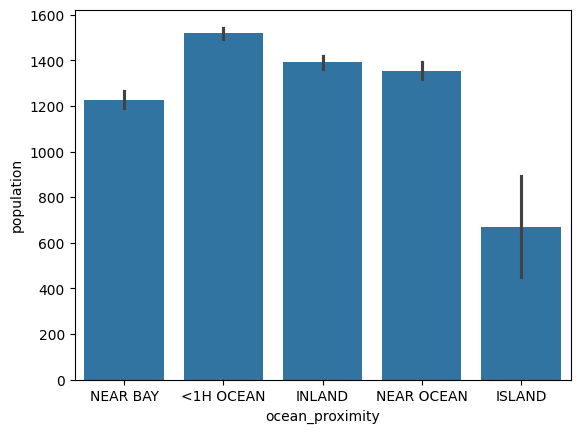

In [21]:
# let's see the distribution of population according to the ocean proximity
sns.barplot(y='population',x='ocean_proximity', data=df)

we see that most people live at less than 1 hour from the ocean

<Axes: xlabel='ocean_proximity', ylabel='housing_median_age'>

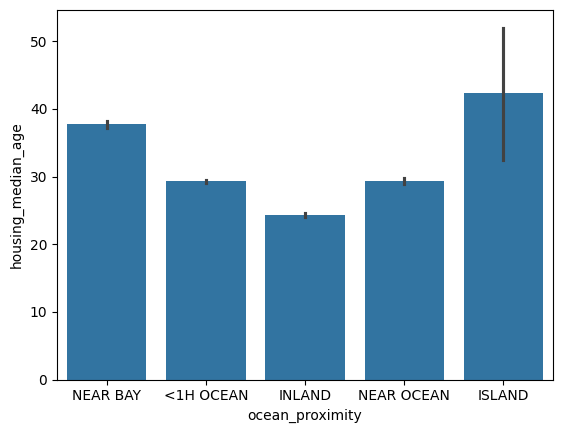

In [22]:
sns.barplot(y='housing_median_age',x='ocean_proximity',data=df)

most inland houses have been built recently while most in the island are old

<Axes: xlabel='median_income', ylabel='Prices'>

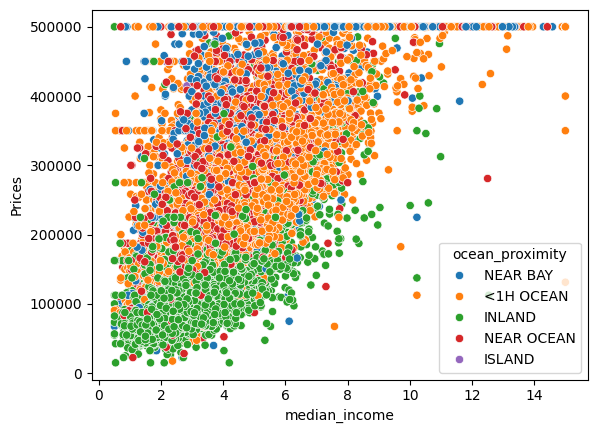

In [23]:
# we want to see if there is correaltion between median_income of people and the value of houses where they live in, also see if those who live near ocean have higher income. 
sns.scatterplot(x='median_income',y='Prices',data=df, hue='ocean_proximity')

 we see that there is a strong correaltion between the median income people earn and the value of the house they live in at an average level, and we clearly see that people with higher wages live near the ocean, near the ocean and less than 1 hour from the ocean while most people who earn less live inland.

<Axes: xlabel='total_bedrooms', ylabel='Prices'>

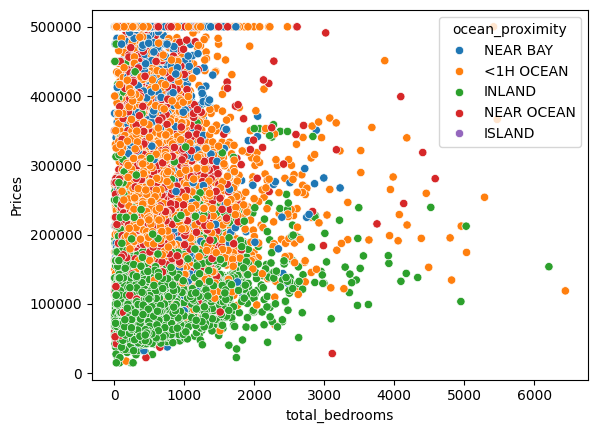

In [24]:
# let's see the number of bedrooms and prices if they correlate in relation to the age of the houses.
sns.scatterplot(x='total_bedrooms',y='Prices',data=df, hue='ocean_proximity')

most houses have an average of 2300 rooms and houses that cost less 200000 usd and houses are inland, while most houses near bay cost more than 400000 usd

<Axes: xlabel='Prices', ylabel='total_bedrooms'>

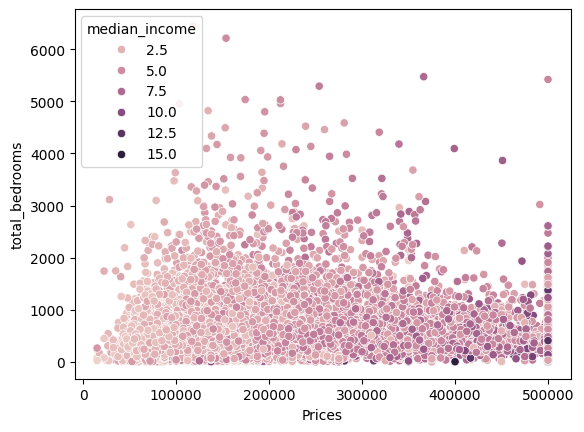

In [25]:
# let's see the number of bedrooms and prices if they correlate in relation to people's incomes.
sns.scatterplot(y='total_bedrooms',x='Prices',data=df, hue='median_income')

there is a strong correlation between the number of rooms and the value of the house and people who live in rooms with small number of rooms have lower incomes.

<Axes: xlabel='median_income', ylabel='total_rooms'>

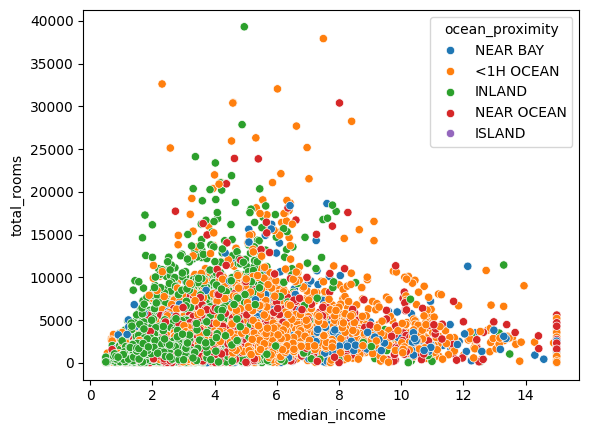

In [26]:
# let's see if the people's income in different areas have an affect on the number of the rooms in which they live in,
sns.scatterplot(x='median_income',y='total_rooms',data=df, hue='ocean_proximity')

the mean of rooms is around 10000 and the poor people live under 5000 and they live inland, and richer around 5000 rooms on average and live 1 hour away from the ocean, and nearbay people are rich and their room have the same number as those inland,

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Prices,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='ocean_proximity', ylabel='median_income'>

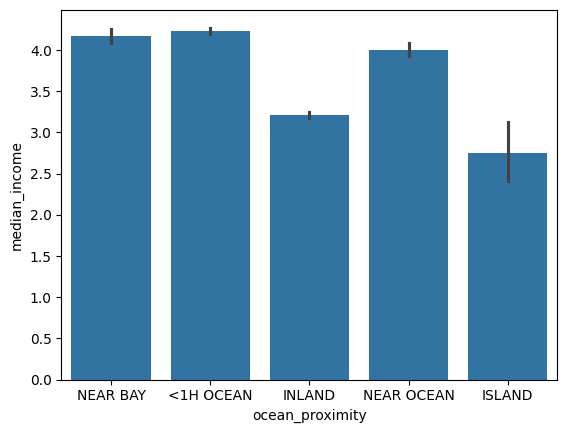

In [28]:
# let's finally check if only rich people live near the ocean and the poor inland
sns.barplot(y='median_income',x='ocean_proximity', data=df)

people who live nearbay, less than an hour away to the ocean and near ocean are richer than those living inland and in island.

Text(0.5, 1.0, 'income and price relation')

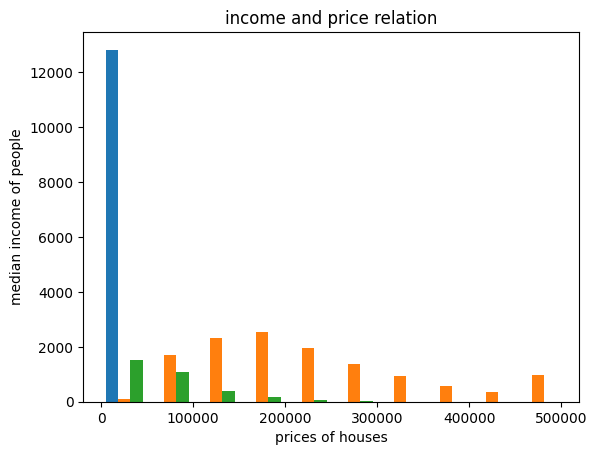

In [29]:
# let's see the distribution of the income of people and the houses in which they live

dif=df.groupby('median_income').agg({'Prices':['mean','std']}).reset_index()
plt.hist(dif)
plt.xlabel('prices of houses')
plt.ylabel('median income of people')
plt.title('income and price relation')

housing_median_age    28.633094
dtype: float64

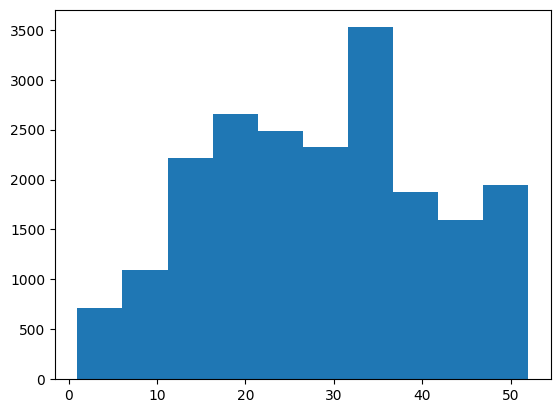

In [30]:
# let's see the distribution of the housing median age.
age=df[['housing_median_age']]
plt.hist(age)
age.mean()

## Linear Regression

In [31]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Prices,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



help(df.drop)


In [32]:
df=df.drop(['ocean_proximity'],axis=1)



In [33]:
# standardization of the data
scaler=StandardScaler()
df1=scaler.fit_transform(df)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Prices
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [48]:
# training with linear regression model
X=np.asanyarray(df.drop(['Prices'],axis=1))
y=np.asanyarray(df['Prices'])
scaler=StandardScaler
x=scaler().fit_transform(X.astype(float))

In [49]:
# splitting the data into a training and test set
X_train, X_test,y_train,y_test=train_test_split(x,y ,test_size=0.2,random_state=4)
#fitting the model with linear regression
model=LinearRegression()
lr=model.fit(X_train,y_train)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

# let's predict some data left in our test dataset

y_hat=model.predict(X_test)


# regression coefficient
print('coefficient:',model.coef_)
print('intercept:',model.intercept_)

(16346, 8) (16346,)
(4087, 8) (4087,)
coefficient: [-86267.48615326 -91840.10971978  14169.65281083 -15356.15463191
  42609.24570014 -51518.63469493  27611.75993387  75608.51454556]
intercept: 206690.43229962143


from here we can see the full correlation between variables and the prices and bellow is our function:


Price=206690-86267.486*longitude-91840.109*latitude+14169.65*age-15356*total_rooms+42609.25*total_bedrooms-51518.63*population+27611.76*households+75608.51*income

### Model Evaluation

0.6128950836787737

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

0.6128950836787737

In [60]:
from sklearn.linear_model import Ridge
Ridge_Model=Ridge(alpha=10)
Ridge_Model.fit(X_train,y_train)
Ridge_Model.score(X_test,y_test) # Precision has increased

0.6131381341425857

In [61]:
Ridge_Model.predict(X_test)

array([235073.5696625 , 219224.91409902, 124339.34988459, ...,
       439196.94896261, 344294.04886265, 246798.24041094])

In [76]:
from sklearn.model_selection import GridSearchCV
RR=Ridge()
parameters=[{'alpha':[1, 10 , 100 , 1000]}]
Grid=GridSearchCV(RR, param_grid=parameters,cv =4, )
Grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [1, 10, 100, 1000]}])

In [73]:
print('best parameters:', Grid.best_estimator_)

best parameters: Ridge(alpha=10)


# Deep Learning Neural Networks

In [79]:
import tensorflow as tf
import keras

In [108]:
from keras.models import Sequential
from keras.layers import Dense

modl=Sequential()
n_cols=X_train.shape[1]
modl.add(Dense(5, activation='relu', input_shape= (n_cols,)))
modl.add(Dense(3,activation='relu'))
modl.add(Dense(1))
modl.compile(optimizer='adam',loss='mse')
modl.fit(X_train,y_train, epochs=4)
predictions=modl.predict(X_test)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 56482820096.0000
Epoch 2/4
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55700209664.0000
Epoch 3/4
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56107921408.0000
Epoch 4/4
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56458956800.0000
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [109]:
r2_score(y_test, predictions)

-3.225316828840678